### Import Libraries

In [1]:
import pandas as pd 
from numpy import mean  
from numpy import std  
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import RFE
from sklearn.feature_selection import SelectKBest, f_regression, mutual_info_regression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import  mean_squared_error,r2_score
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score  
from sklearn.model_selection import RepeatedKFold   
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor


### Import Dataset:

In [2]:
data = pd.read_csv('PK_eq.csv')
data.head()

,Year,Month,Day,Time,Lat,Lon,Depth,Mag,Region,Timestamp
0,2022,4,11,1:41:41,33.2832,70.5607,41.2,4.8,PAKISTAN,1649641301
1,2022,3,18,2:54:11,30.1460,72.5955,15.3,4.2,PAKISTAN,1647572051
2,2022,7,31,13:42:13,25.1527,63.5489,10.0,5.6,SOUTHWESTERN PAKISTAN,1659274933
3,2022,5,6,6:21:18,26.9542,66.2725,10.0,5.2,PAKISTAN,1651818078
4,2022,7,31,13:52:16,25.1473,63.4376,10.0,5.1,SOUTHWESTERN PAKISTAN,1659275536


### Data Understanding

In [3]:
print("Shape of the dataset:", data.shape)

Shape of the dataset: (4546, 10)


In [4]:
print("Columns in the dataset:", data.columns)

Columns in the dataset: Index(['Year', 'Month', 'Day', 'Time', 'Lat', 'Lon', 'Depth', 'Mag', 'Region',
       'Timestamp'],
      dtype='object')


In [5]:
starting = data['Year'].min()
till = data['Year'].max()

print("Starting year:", starting)
print("Till year:", till)

Starting year: 1970
Till year: 2022


In [6]:
print("Data types of columns:")
print(data.dtypes)

Data types of columns:
Year           int64
Month          int64
Day            int64
Time          object
Lat          float64
Lon          float64
Depth        float64
Mag          float64
Region        object
Timestamp      int64
dtype: object


In [7]:
print("Summary Statistics:")
data.describe()

Summary Statistics:


,Year,Month,Day,Lat,Lon,Depth,Mag,Timestamp
count,4546.000000,4546.000000,4546.000000,4546.000000,4546.000000,4546.000000,4546.000000,4.546000e+03
mean,2002.873295,7.116146,15.574131,31.482930,70.346297,25.202574,3.996854,1.054725e+09
std,10.029188,3.559851,8.758331,3.077798,3.283553,28.849384,0.625583,3.178132e+08
min,1970.000000,1.000000,1.000000,23.498400,61.091100,0.000000,2.100000,2.471259e+07
25%,1998.000000,4.000000,8.000000,29.610800,67.760400,10.000000,3.600000,8.969340e+08
50%,2005.000000,8.000000,15.000000,31.469400,70.619850,21.000000,3.900000,1.129399e+09
75%,2008.000000,10.000000,24.000000,34.581300,73.253425,33.000000,4.400000,1.226745e+09
max,2022.000000,12.000000,31.000000,35.123900,75.373700,831.200000,7.800000,1.666717e+09


### Checking Missing Values

In [8]:
print("Missing Values:")
print(data.isnull().sum())

Missing Values:
Year         0
Month        0
Day          0
Time         0
Lat          0
Lon          0
Depth        0
Mag          0
Region       0
Timestamp    0
dtype: int64


### Visualization

##### Distribution of Magnitude


D:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


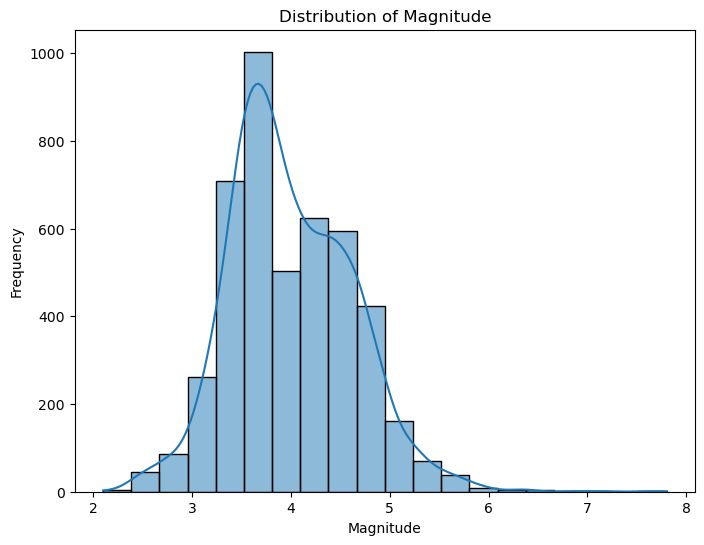

In [9]:
plt.figure(figsize=(8, 6))
sns.histplot(data['Mag'], bins=20, kde=True)
plt.title('Distribution of Magnitude')
plt.xlabel('Magnitude')
plt.ylabel('Frequency')
plt.show()

In [10]:
data['Mag'].mean()

3.9968543774747025

##### Distribution of Depth


D:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


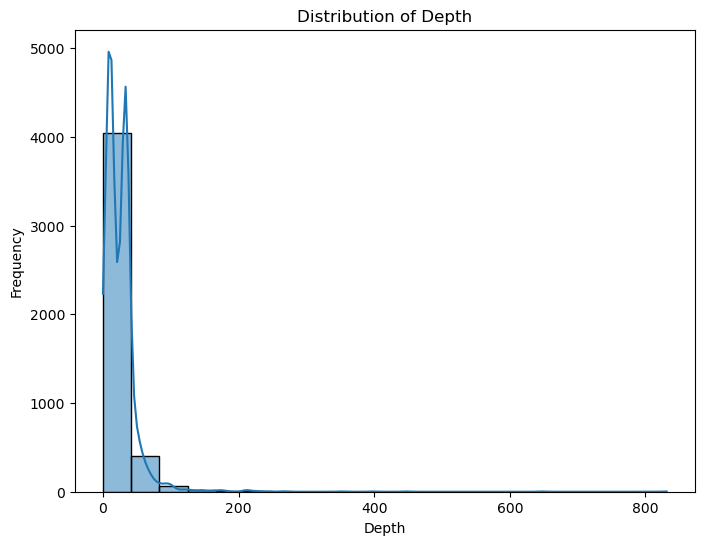

In [11]:
plt.figure(figsize=(8, 6))
sns.histplot(data['Depth'], bins=20, kde=True)
plt.title('Distribution of Depth')
plt.xlabel('Depth')
plt.ylabel('Frequency')
plt.show()

In [12]:
data['Depth'].max()

831.2

##### scatterplot Depth vs Magnitude


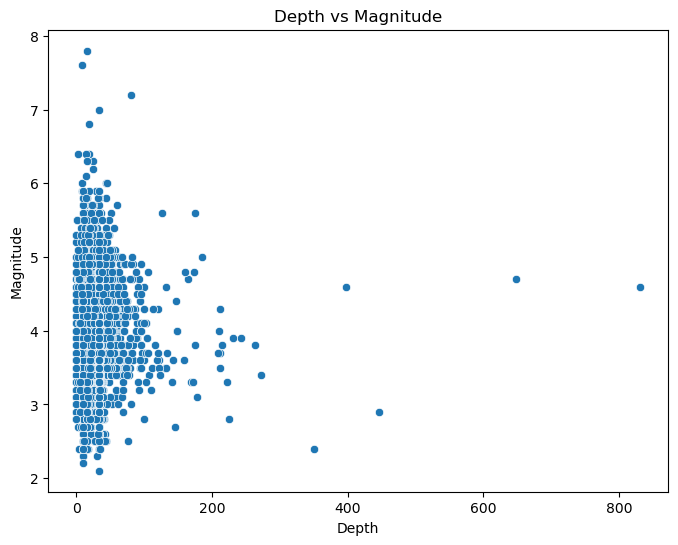

In [13]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Depth', y='Mag', data=data)
plt.title('Depth vs Magnitude')
plt.xlabel('Depth')
plt.ylabel('Magnitude')
plt.show()

##### Regions with Most Earthquakes


###### Note: Values with Pakistan are the ones that are not recorded with a specific location name.

AttributeError: Rectangle.set() got an unexpected keyword argument 'legend'

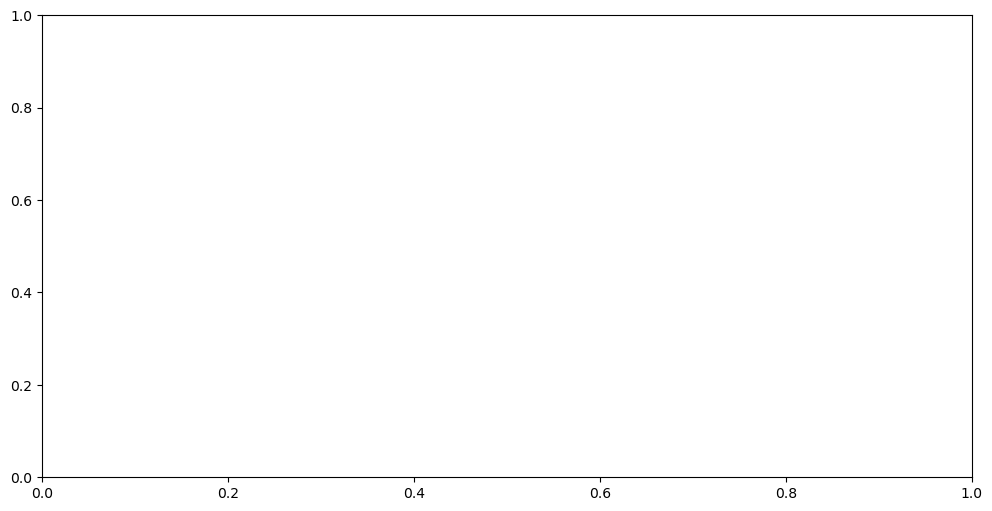

In [14]:
plt.figure(figsize=(12, 6))
sns.countplot(x='Region', data=data, hue='Region', palette='Set1', order=data['Region'].value_counts().index[:10], legend=False)
plt.title('Regions with Most Earthquakes')
plt.xlabel('Region')
plt.ylabel('Count')
plt.xticks(rotation=40)
plt.show()


In [23]:
data['Region'].value_counts()

Region
PAKISTAN                        3863
SOUTHWESTERN PAKISTAN            181
SOUTHWESTERN KASHMIR             168
INDIA-PAKISTAN BORDER REGION     108
OFF COAST OF PAKISTAN             88
EASTERN KASHMIR                   68
NORTHWESTERN KASHMIR              50
KASHMIR-INDIA BORDER REGION       20
Name: count, dtype: int64

##### Count of Earthquakes by Year


AttributeError: 'numpy.int64' object has no attribute 'startswith'

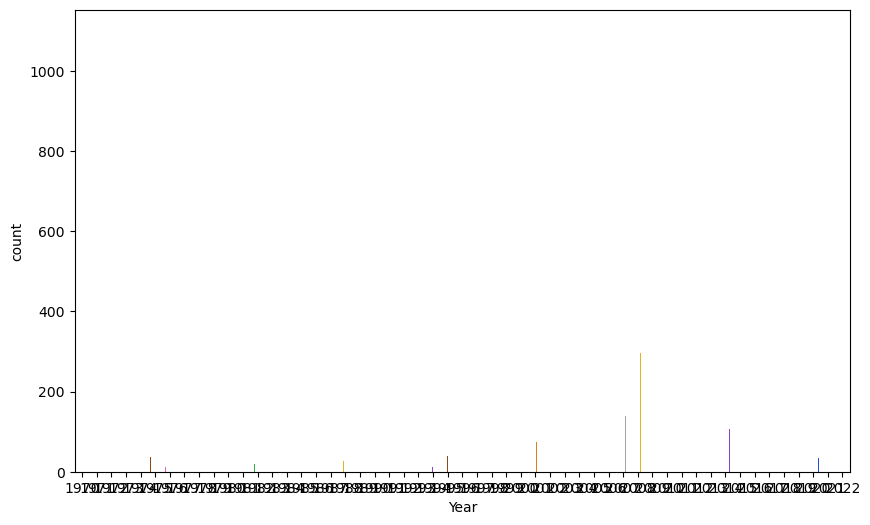

In [24]:
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='Year', hue='Year', data=data, palette='bright')
plt.title('Count of Earthquakes by Year')
plt.xlabel('Year')
plt.ylabel('Count')
plt.xticks(rotation=90)

ax.legend_.remove()

plt.show()

##### Count of Earthquakes by Month


In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Month',hue='Month', data=data, palette='bright')
plt.title('Count of Earthquakes by Month')
plt.xlabel('Month')
plt.ylabel('Count')
plt.show()

##### Count of Earthquakes by Day


In [ ]:
plt.figure(figsize=(15, 6))
ax = sns.countplot(x='Day',hue='Day', data=data, palette='bright')
plt.title('Count of Earthquakes by Day of the Month')
plt.xlabel('Day of the Month')
plt.ylabel('Count')
ax.legend_.remove()
plt.show()

##### Correlation Heatmap


In [ ]:
numeric_data = data[['Year', 'Month', 'Day', 'Lat', 'Lon', 'Depth', 'Mag']]
plt.figure(figsize=(10, 8))
correlation_matrix = numeric_data.corr()
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap="viridis")
plt.title('Heatmap of Correlation Matrix')
plt.show()

## Partitioning Data

In [26]:
X = data[['Year', 'Month', 'Day', 'Lat', 'Lon', 'Depth']]
y = data['Mag']

## feature selection.

#### Statistical Method
##### ANOVA F-value

In [27]:
list_anova =[]

selector_f = SelectKBest(score_func=f_regression, k=4)  
X_new_f = selector_f.fit_transform(X, y)

selected_features_f = X.columns[selector_f.get_support()]
for feature in selected_features_f:
    list_anova .append(feature)
    
print("Selected Features (ANOVA F-value):", list_anova )

Selected Features (ANOVA F-value): ['Year', 'Lat', 'Lon', 'Depth']


##### Mutual Information

In [28]:
list_mi =[]

selector_mi = SelectKBest(score_func=mutual_info_regression, k=4)  
X_new_mi = selector_mi.fit_transform(X, y)

selected_features_mi = X.columns[selector_mi.get_support()]
for feature in selected_features_mi:
    list_mi .append(feature)

print("Selected Features (Mutual Information): ",list_mi )



Selected Features (Mutual Information):  ['Year', 'Lat', 'Lon', 'Depth']


#### Machine Learning Model

##### Recursive Feature Elimination (RFE)

In [29]:
list_rfe = []
model = LinearRegression()
rfe = RFE(model, n_features_to_select=4)
X_rfe = rfe.fit_transform(X, y)

selected_features_rfe = X.columns[rfe.get_support()]

for feature in selected_features_rfe:
    list_rfe.append(feature)

print("Selected Features (Recursive Feature Elimination):", list_rfe)

Selected Features (Recursive Feature Elimination): ['Year', 'Month', 'Lat', 'Lon']


#### Split the data into training and testing sets

In [30]:
X_selected_feature = data[list_anova]
y = data['Mag']
X_train, X_test, y_train, y_test = train_test_split(X_selected_feature, y, test_size=0.3, random_state=42)


#### Model Building


##### Ensemble Models 

In [ ]:
models = []
models.append(('lr', LinearRegression()))   
models.append(('knn', KNeighborsRegressor()))   
models.append(('tree', DecisionTreeRegressor()))   
models.append(('rf', RandomForestRegressor(n_estimators=100, random_state=42)))  
models.append(('gb', GradientBoostingRegressor(n_estimators=100, random_state=42)))  
models.append(('svm', SVR()))  

def evaluate_model(model, X_selected_feature, y):
    cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
    scores = cross_val_score(model, X_selected_feature, y, scoring='neg_mean_squared_error', cv=cv, n_jobs=-1)
    return scores

results, model_names = [], []
for name, model in models:  
    scores = evaluate_model(model, X_selected_feature, y)  
    results.append(scores)  
    model_names.append(name)  
    print('> %s MSE: %.3f (%.3f)' % (name, mean(-scores), std(-scores)))

# Plot the results
pyplot.boxplot(results, labels=model_names)  
pyplot.ylabel('Negative MSE')
pyplot.xlabel('Model')
pyplot.title('Negative MSE for Regression Models')
pyplot.show()

#### Apply Random Forest model


In [17]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print("Random Forest Model:")
print("Mean Squared Error (MSE):", mse_rf)
print("R-squared (R2):", r2_rf)

NameError: name 'X_train' is not defined

#### GradientBoostingRegressor

In [16]:
gb_model = GradientBoostingRegressor(n_estimators=100, random_state=42)
gb_model.fit(X_train, y_train)
y_pred_gb = gb_model.predict(X_test)
mse_gb = mean_squared_error(y_test, y_pred_gb)
r2_gb = r2_score(y_test, y_pred_gb)

print("\nGradient Boosting Model:")
print("Mean Squared Error (MSE):", mse_gb)
print("R-squared (R2):", r2_gb)

NameError: name 'X_train' is not defined

#### Predicting on new data


In [15]:
X_new = np.array(['2088','30.0498','69.8699','17']).reshape(1, -1)
y_pred_rf_new = rf_model.predict(X_new)
y_pred_gb_new = gb_model.predict(X_new)

print("\nPredicted Magnitudes on New Data (Random Forest Model): %.1f" % y_pred_rf_new[0])
print("Predicted Magnitudes on New Data (Gradient Boosting Model): %.1f" % y_pred_gb_new[0])

NameError: name 'rf_model' is not defined